# Recurrent Neural Networks **&** Introduction to Transformers
_Sentiment analysis through Recurrent Neural Networks & Transformers_

---

In this tutorial, we are interested in the problem of sentiment analysis. In the first part, we will build a recurrent network on a toy dataset from scratch to determine if a sentence is positive or negative. In a second step, using the [`Keras`](https://keras.io/) API, we will build a network able to determine if a movie review is positive or negative.

---

In [ ]:
import numpy as np
import pandas as pd
import numpy.random as rd
import matplotlib.pyplot as plt
import random

---
# **PART I**: RNN from Scratch

In order to understand recurrent networks in more detail, our first example will be implementing a network from scratch. The network will perform a (simple) sentiment analysis task, namely determining whether a given text string is positive or negative.


## Pre-Processing

The commands below allow displaying some samples of our toy dataset.

In [ ]:
from data import train_data, test_data

list(train_data.items())[:15]

### Data Visualization

In order to visualize quickly the labels, we want display in _green_ the <span style="color:green">positive sentences</span>, and in _red_ the <span style="color:orangered">negative sentences</span>.

In [ ]:
from colorama import Fore

##### <span style="color:purple">**Todo:** Using the command `Fore.COLOR` of the package [`colorama`](https://pypi.org/project/colorama/), realize such a function.</span>


In [ ]:
### TO BE COMPLETED ### 

def coloredSentences(sentences, out=15):
    """
    Display in green the positive sentences, and in red the negative sentences
    - sentences is a dict
        - sentences.keys() are the sentences to display
        - sentences.values() are booleans that encode the sentiment
    - out is an integer indicating the maximum number of sentences to display
    """
    [...]

In [ ]:
%load solutions/scratch/coloredSentences.py

In [ ]:
coloredSentences(train_data)

### Vocabulary

The datasets consists of two $\texttt{dictionaries}$. Before trying to classify these sentences, we will build a vocabulary of all of all words that exist in our data

##### <span style="color:purple">**Question:** How many different words are in our vocabulary?</span>

To answer this question, start by building a **vocabulary**, _i.e._ a $\texttt{list}$ containing all the words used in the dataset. _Each word should occur only once_.

<!-- 18 unique words found -->

In [ ]:
### TO BE COMPLETED ### 

vocab = ...
vocab_size = ...

print('%d unique words found' % vocab_size)

In [ ]:
# %load solutions/scratch/vocab_size.py

### Word Encoding

A neural network cannot take strings as input. So we have to encode these sentences in a format understandable by a computer.

##### <span style="color:purple">**Todo:** Assign an integer index to represent each word of the vocab</span>

To do that, construct two $\texttt{dictionaries}$ allowing to translate words into integer indices, and vice versa :

* $\texttt{word_to_idx}$ has for keys the words of the vocabulary; and for value an integer index, the order in which the words appear in the vocabulary for example.
* $\texttt{idx_to_word}$ performs the opposite translation: its keys are the integer indices while its values are the associated words.

In [ ]:
### TO BE COMPLETED ### 

word_to_idx = ...
idx_to_word = ...

print(word_to_idx['good'])
print(idx_to_word[0])

In [ ]:
# %load solutions/scratch/decode.py

This way of encoding words works quite well. However, it has the disadvantage of introducing a preferential but meaningless order in how words are processed. Since the vocabulary size is reasonable, we will use a one-shot encoding instead.

##### <span style="color:purple">**Todo:** Write a function $\texttt{createInputs}$ that performs one-hot encoding</span>

This function will return a $\texttt{list}$ of the one-hot encodings of each word that compose the input sentence.

In [ ]:
### TO BE COMPLETED ### 

def createInputs(text):
    '''
    Returns an array of one-hot vectors representing the words in the input text string.
    - text is a string
    - Each one-hot vector has shape (vocab_size, 1)
    '''
    [...]

In [ ]:
# %load solutions/scratch/createInputs.py

In [ ]:
createInputs('i am very good')

## The Forward Phase

In this part, we will build the simplest possible recursive network. To do so, we will create an $\texttt{RNN}$ class that we will update as we build it. We want to classify a textual data. To do so, we will use a many-to-one network, as shown in the figure below.

<img src="img/many-to-one.png" width=250>

Let a sentence $x=(x_0,\ldots,x_n)$, its label $y$, and let $h=(h_0,\ldots,h_n)$ be the corresponding hidden state. We give ourselves three weight matrices, $W_{xh}$, $W_{hh}$ and $W_{hy}$, and two bias vectors, $b_h$ and $b_y$, so that, for any $t\in[\![0,n]\!]$:

$$ \left\{\begin{aligned}
    h_t &= \tanh\left( W_{xh}x_t + W_{hh}h_{t-1} + b_h \right) \\
    y &= softmax(W_{hy}h_n + b_y)
\end{aligned}\right. $$

##### <span style="color:purple">**Question:** What is the dimension of the different weight matrices and bias vectors?</span>

You can freely use the following notations:
* $n_h$ denotes the $\texttt{hidden_size}$, _i.e._ the size oh the hidden vectors $h_t$;
* $n_x$ denotes the $\texttt{input_size}$, _i.e._ the size of the inputs $x_t$;
* $n_y$ denotes the $\texttt{output_size}$, _i.e._ the size of the output $y$.

**Answer:**

<span style="color:teal ">[Solution]</span>

<!-- **Solution**:
* $W_{xh}\in\mathcal{M}_{n_h,n_x}(\mathbb{R})$
* $W_{hh}\in\mathcal{M}_{n_h,n_h}(\mathbb{R})$
* $W_{hy}\in\mathcal{M}_{n_y,n_h}(\mathbb{R})$
* $b_h\in\mathcal{M}_{n_h,1}(\mathbb{R})$
* $b_y\in\mathcal{M}_{n_y,1}(\mathbb{R})$ -->

##### <span style="color:purple">**Todo:** Initialize the weight matrices and bias vectors. Realize the forward pass.</span>

* The weights are initialized from the standard normal distribution, dividing by 1000 to reduce the initial variance. The biases are initialized to zero. 
* For the forward pass, first initialize the hidden state $h_0$ to zero, then perform each step of the RNN.

**Note:** As said, dividing by 1000 the weights reduce the initial variance. This is not the best way to initialize weights, but it's simple and works for this simple example.

In [ ]:
### TO BE COMPLETED ### 

class RNN:
    # A Vanilla Recurrent Neural Network.

    def __init__(self, input_size, output_size, hidden_size=64):
        # Weights
        self.Whh = ...
        self.Wxh = ...
        self.Why = ...

        # Biases
        self.bh = ...
        self.by = ...
        
    # ----- #

    def forward(self, inputs):
        '''
        Perform a forward pass of the RNN using the given inputs.
        Returns the final output and hidden state.
        - inputs is an array of one-hot vectors with shape (input_size, 1).
        '''
        
        [...]

        return y, h

**Remark:** Before looking at the solution, you can test your $\texttt{RNN}$ class by passing any input into the network. See below.

In [ ]:
# %load solutions/scratch/RNN_v1.py

The binary classification is performed using the $\texttt{softmax}$ function.

##### <span style="color:purple">**Todo:** Implement the softmax function.</span>

As a reminder, for $x=(x_0,\ldots,x_n)$ and $i_0\in[\![0,n]\!]$, $~softmax(x_{i_0}) = \frac{e^{x_{i_0}}}{\sum_i e^{x_i}}$.

In [ ]:
def softmax(x):
    # Applies the Softmax function to the input array.
    [...]

In [ ]:
# %load solutions/scratch/softmax.py

To ensure that we have not made an implementation error, we can pass a sentence from the training set through the network. Since the network has not yet been trained, we should find that this sentence is as likely to be positive as negative, i.e., a probability vector approximately equal to [0.5, 0.5].

In [ ]:
# Initialize the RNN
rnn = RNN(vocab_size, 2)

inputs = createInputs('i am very good')
out, _ = rnn.forward(inputs)

probs = softmax(out)
print(probs)

## The Backward Phase

Lets move on to training. To this end, we first need a loss function. We will use the cross-entropy loss, which is often associated with the $softmax$ function. Let $\sigma$ denotes the $softmax$ function and $y_c$ be the _correct_ class. Then:

$$ \mathcal{L} = \mathcal{L}(x,y;W_{xh},W_{hh},W_{hy},b_h,b_y) = -\log(p_c) \qquad\text{where}\qquad p_c = \sigma(y_c) \,. $$


##### <span style="color:purple">**Exercise:** Prove that for all $i\in[\![0,n_y]\!]$, $\displaystyle\quad\frac{\partial\mathcal{L}}{\partial y_i} = \left\{\begin{aligned}
    &p_i=\sigma(y_i) & \text{if}\quad i\neq c\\
    &p_c-1=\sigma(y_c)-1 & \text{if}\quad i=c
\end{aligned}\right. $</span>

**Answer:**

<span style="color:teal ">[Solution]</span>

<!-- **Solution**: $\mathcal{L}(y_i)=-\log(\sigma(y_c))$. Hence, $\displaystyle\frac{\partial\mathcal{L}}{\partial y_i}=-\frac1{\sigma(y_c)}\times\frac{\partial\sigma}{\partial y_i}$.
* If $i\neq c$,
$$ \frac{\partial\sigma}{\partial y_i} = \frac{ -e^{y_c}\times e^{y_i} }{ \left(\sum_ke^{y_k}\right)^2 }
    = \frac{-e^{y_c}}{\sum_ke^{y_k}}\times\frac{e^{y_i}}{\sum_ke^{y_k}} = -\sigma(y_c)\times\sigma(y_i) 
    \qquad\text{and}\qquad
   \frac{\partial\mathcal{L}}{\partial y_i} = -\frac{-\sigma(y_c)\times\sigma(y_i)}{\sigma(y_c)} = \sigma(y_i)=p_i \,. $$

* Else,
$$ \frac{\partial\sigma}{\partial y_c} = \frac{ e^{y_c}\left(\sum_ke^{y_k}\right)-e^{y_c}\times e^{y_c} }{ \left(\sum_ke^{y_k}\right)^2 }
    = \frac{e^{y_c}}{\sum_ke^{y_k}}-\left(\frac{e^{y_c}}{\sum_ke^{y_k}}\right)^2 = \sigma(y_c)-\sigma(y_c)^2 
    \qquad\text{and}\qquad
   \frac{\partial\mathcal{L}}{\partial y_c} = -\frac{\sigma(y_c)-\sigma(y_c)^2}{\sigma(y_c)} = \sigma(y_c)-1=p_c-1 \,. $$-->

Let us modify the $\texttt{forward}$ function in the $\texttt{RNN}$ class to cache the hidden states $h$ and the inputs $x$, which we will need for computing the gradients in the back-propagation.

In [ ]:
class RNN:
    # A Vanilla Recurrent Neural Network.

    def __init__(self, input_size, output_size, hidden_size=64):
        # Weights
        self.Whh = rd.randn(hidden_size, hidden_size) / 1000
        self.Wxh = rd.randn(hidden_size, input_size) / 1000
        self.Why = rd.randn(output_size, hidden_size) / 1000

        # Biases
        self.bh = np.zeros((hidden_size, 1))
        self.by = np.zeros((output_size, 1))
    
    # ----- #
    
    def forward(self, inputs):
        '''
        Perform a forward pass of the RNN using the given inputs.
        Returns the final output and hidden state.
        - inputs is an array of one-hot vectors with shape (input_size, 1).
        '''
        h = np.zeros((self.Whh.shape[0], 1))

        self.inputs = inputs  ### NEW ###
        self.hs = { 0: h }    ### NEW ###
        
        # Perform each step of the RNN
        for i, x in enumerate(inputs):
            h = np.tanh(self.Wxh @ x + self.Whh @ h + self.bh)
            self.hs[i+1] = h  ### NEW ###
            
        # Compute the output
        y = self.Why @ h + self.by

        return y, h
    
    # ----- #
    
    def backprop(self, d_y, learn_rate=2e-2):
        '''    
        Perform a backward pass of the RNN.    
        - d_y (dL/dy) has shape (output_size, 1).    
        - learn_rate is a float.    
        '''    
        pass

Therefore, **given a backward pass**, we can train the RNN using the following loop on all training data

In [ ]:
### TO BE COMPLETED ### 

rnn = RNN(vocab_size, 2)

# Loop over each training example
for x, y in train_data.items():
    inputs = createInputs(x)
    target = int(y)

    # Forward
    out, _ = ...
    probs = ...

    # Build dL/dy
    d_L_d_y = ...
    
    # Backward
    rnn.backprop(d_L_d_y)
    
print(probs)

In [ ]:
# %load solutions/scratch/trainingLoop.py

### Gradient Computation

It is then sufficient to backpropagate the gradient to train the network.

##### <span style="color:purple">**Question:** What are the parameters of the model to optimize?</span>

**Answer:**

<span style="color:teal ">[Solution]</span>

<!-- **Solution**: 
* The weights matrices $W_{xh}\in\mathcal{M}_{n_h,n_x}(\mathbb{R})$, $W_{hh}\in\mathcal{M}_{n_h,n_h}(\mathbb{R})$ and $W_{hy}\in\mathcal{M}_{n_y,n_h}(\mathbb{R})$
* The bias vectors $b_h\in\mathcal{M}_{n_h,1}(\mathbb{R})$ and $b_y\in\mathcal{M}_{n_y,1}(\mathbb{R})$ -->

##### <span style="color:purple">**Exercise:** Compute the gradients $\frac{\partial\mathcal{L}}{\partial W_{hy}}$ and $\frac{\partial\mathcal{L}}{\partial b_y}$.</span>

**Answer:**

<span style="color:teal ">[Solution]</span>

<!-- **Solution**: Recall that $y=W_{hy}h_n+b_y$, where $h_n$ is the final hidden state. Then:
* $\displaystyle\frac{\partial\mathcal{L}}{\partial W_{hy}} 
    = \frac{\partial\mathcal{L}}{\partial y}\times\frac{\partial y}{\partial W_{hy}}
    = \frac{\partial\mathcal{L}}{\partial y} h_n \,;$
    
* $\displaystyle\frac{\partial\mathcal{L}}{\partial b_y} 
    = \frac{\partial\mathcal{L}}{\partial y}\times\frac{\partial y}{\partial b_y}
    = \frac{\partial\mathcal{L}}{\partial y} \,.$
    
_Note:_ Beware of the dimensions of these objects! These are not partial derivatives in $\mathbb{R}$... -->

Finally, we need the gradients for $W_{xh}$, $W_{hh}$, and $b_h$, which are used every step during the RNN. For example, for $W_{xh}$, we have 
$$ \frac{\partial\mathcal{L}}{\partial W_{xh}} = \frac{\partial\mathcal{L}}{\partial y} \sum_{t=0}^n \frac{\partial y}{\partial h_t}\frac{\partial h_t}{\partial W_{xh}} $$
because changing $W_{xh}$ affects every $h_t$, which all affect $y$ and ultimately $\mathcal{L}$. In order to fully calculate the gradient of $W_{xh}$, we will need to backpropagate through all time-steps, which is known as Backpropagation Through Time (BPTT).

<img src="img/bptt.png" width=250>

##### <span style="color:purple">**Exercise:** At a given time step $t$, compute $\frac{\partial h_t}{\partial W_{xh}}$, $\frac{\partial h_t}{\partial W_{hh}}$ and $\frac{\partial h_t}{\partial b_h}$.</span>

**Answer:** 

<span style="color:teal ">[Solution]</span>

<!-- **Solution**: Recall that $h_t=\tanh\left( W_{xh}x_t + W_{hh}h_{t-1} + b_h \right)$ and that $\tanh^\prime(x)=1-\tanh^2(x)$. Then:

* $\displaystyle\frac{\partial h_t}{\partial W_{xh}} = (1-h_t^2)\,x_t \,;$
    
* $\displaystyle\frac{\partial h_t}{\partial W_{hh}} = (1-h_t^2)\,h_{t-1} \,;$
    
* $\displaystyle\frac{\partial h_t}{\partial b_h} = (1-h_t^2) \,.$ -->

The last thing we need is $\frac{\partial y}{\partial h_t}$. We can calculate it recursively:

$$ \forall t\in[\![0,n-1]\!]\,,\quad  \dfrac{\partial y}{\partial h_t} 
    = \dfrac{\partial y}{\partial h_{t+1}}\times\dfrac{\partial h_{t+1}}{\partial h_t} 
    = \dfrac{\partial y}{\partial h_{t+1}}\,(1-h_t^2)\,W_{hh}
    \qquad\text{and}\qquad 
    \dfrac{\partial y}{\partial h_n}=W_{hy} \,.$$
    
_Note:_ The recursion is _backward!_ We will implement BPTT starting from the last hidden state and working backwards, so we will already have $\frac{\partial y}{\partial h_{t+1}}$ by the time we want to calculate $\frac{\partial y}{\partial h_t}$.

#### Back-Propagation Through Time

##### <span style="color:purple">**Todo:** Using the previous gradients computations, implement the back-propagation through time.</span>

In [ ]:
### TO BE COMPLETED ### 

class RNN:
    # A Vanilla Recurrent Neural Network.

    def __init__(self, input_size, output_size, hidden_size=64):
        # Weights
        self.Whh = rd.randn(hidden_size, hidden_size) / 1000
        self.Wxh = rd.randn(hidden_size, input_size) / 1000
        self.Why = rd.randn(output_size, hidden_size) / 1000

        # Biases
        self.bh = np.zeros((hidden_size, 1))
        self.by = np.zeros((output_size, 1))
    
    # ----- #
    
    def forward(self, inputs):
        '''
        Perform a forward pass of the RNN using the given inputs.
        Returns the final output and hidden state.
        - inputs is an array of one-hot vectors with shape (input_size, 1).
        '''
        h = np.zeros((self.Whh.shape[0], 1))

        self.inputs = inputs
        self.hs = { 0: h }
        
        # Perform each step of the RNN
        for i, x in enumerate(inputs):
            h = np.tanh(self.Wxh @ x + self.Whh @ h + self.bh)
            self.hs[i + 1] = h
            
        # Compute the output
        y = self.Why @ h + self.by

        return y, h
    
    # ----- #
    
    def backprop(self, d_y, learn_rate=2e-2):
        '''    
        Perform A backward pass of the RNN.    
        - d_y (dL/dy) has shape (output_size, 1).    
        - learn_rate is a float.    
        '''    
        n = len(self.inputs)

        # Calculate dL/dWhy and dL/dby.
        d_Why = ...
        d_by = ...
        
        # Initialize dL/dWhh, dL/dWxh, and dL/dbh to zero.
        d_Whh = ...
        d_Wxh = ...
        d_bh = ...

        # Calculate dL/dh for the last h.
        d_h = ...

        # Backpropagate through time.
        for t in reversed(range(n)):
            # An intermediate value: dL/dh * (1 - h^2)
            tmp = ...

            # dL/db = dL/dh * (1 - h^2)
            d_bh += ...
            # dL/dWhh = dL/dh * (1 - h^2) * h_{t-1}
            d_Whh += ...
            # dL/dWxh = dL/dh * (1 - h^2) * x
            d_Wxh += ...
            # Next dL/dh = dL/dh * (1 - h^2) * Whh
            d_h = ...
            
        # Clip to prevent exploding gradients.
        for d in [d_Wxh, d_Whh, d_Why, d_bh, d_by]:
            np.clip(d, -1, 1, out=d)
            
        # Update weights and biases using gradient descent.
        self.Whh ...
        self.Wxh ...
        self.Why ...
        self.bh ...
        self.by ...

In [ ]:
# %load solutions/scratch/RNN_v2.py

## Training

##### <span style="color:purple">**Todo:** Write a helper function to process data with the RNN.</span>

To do this, you can refer to the various tests we have carried out previously.

In [ ]:
def processData(data, backprop=True):
    '''
    Returns the RNN's loss and accuracy for the given data.
    - data is a dictionary mapping text to True or False.
    - backprop determines if the backward phase should be run.
    '''
    items = list(data.items())
    random.shuffle(items)

    loss = 0
    num_correct = 0

    for x, y in items:
        inputs = ...
        target = ...

        # Forward
        [...]
        probs = ...

        # Calculate loss / accuracy
        loss -= np.log(probs[target])
        num_correct += int(np.argmax(probs) == target)

        if backprop:
            # Build dL/dy
            [...]

            # Backward
            [...]

    return loss/len(data), num_correct/len(data)

In [ ]:
# %load solutions/scratch/processData.py

Last, we can write the training loop:

In [ ]:
rnn = RNN(vocab_size, 2)

# Training loop
for epoch in range(1000):
    train_loss, train_acc = processData(train_data)

    if epoch % 100 == 99:
        print('--- Epoch %d' % (epoch + 1))
        print('Train:\tLoss %.3f | Accuracy: %.3f' % (train_loss, train_acc))

        test_loss, test_acc = processData(test_data, backprop=False)
        print('Test:\tLoss %.3f | Accuracy: %.3f' % (test_loss, test_acc))

##### <span style="color:purple">**Todo:** Visualize the results of the training on the test data.</span>

You will use the same color code as for the visualization of the training data.

In [ ]:
### TO BE COMPLETED ### 

# Visualize the results

In [ ]:
# %load solutions/scratch/coloredResults.py

# Part II: Study of the [IMDB](http://ai.stanford.edu/~amaas/data/sentiment/) Dataset

<img src="img/imdb.png" width=500>

In this second part, we will train a classifier movie reviews in IMDB data set.

In [ ]:
import seaborn as sns

from tensorflow.keras.datasets import imdb

## Pre-Processing

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(start_char=1, oov_char=2, index_from=3)

print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

### Data Exploration

The commands below allow displaying a sample review and its label.

In [ ]:
idx = rd.randint(len(X_train))

print('---review number---')
print(idx)

print('\n---review---')
print(X_train[idx])

print('\n---label---')
print(y_train[idx])

The review is stored as a sequence of integers. These are word IDs that have been pre-assigned to individual words, based on their frequencies: the more frequent a word, the lower the integer. The label is an integer (0 for negative, 1 for positive).

To decode the review, we need to use the vocabulary, _i.e._, the dictionary that associates each word with its unique integer ID, which is available via the `get_word_index()` command.

In [ ]:
pad_char = 0
start_char = 1
oov_char = 2
index_from = 3

word_to_idx = imdb.get_word_index()
idx_to_word = {i+index_from: w for (w, i) in word_to_idx.items()}
idx_to_word[pad_char] = "[PAD]"
idx_to_word[start_char] = "[START]"
idx_to_word[oov_char] = "[OOV]"

##### <span style="color:purple">**Todo:** Write a function that displays a review in a readable form along with its label.</span>

Keep a similar display to the one suggested above. 

In [ ]:
### TO BE COMPLETED ### 

def decodeReview(idx):
    '''
    Converts the encoded idx-th review to human readable form.
    Displays the review number, the review in words and the label
    '''
    [...]

In [ ]:
# %load solutions/imdb/decodeReview.py

In [ ]:
decodeReview(idx)

##### <span style="color:purple">**Question:** What is the proportion of positive reviews in the training dataset? And in the test dataset?</span>

This question can be answered using a barplot.

In [ ]:
### TO BE COMPLETED ### 

# Proportion of positive reviews

In [ ]:
# %load solutions/imdb/positiveProportion.py

##### <span style="color:purple">**Question:** How many different words does this database contain?</span>

In [ ]:
### TO BE COMPLETED ### 

vocab_size = ...

print('%d unique words found' % vocab_size)  

In [ ]:
# %load solutions/imdb/vocab_size.py

##### <span style="color:purple">**Question:** Are all reviews the same length? If not, what is their maximum length?</span>

This question can be answered using an histogram.

In [ ]:
### TO BE COMPLETED ### 

# Lengths of the reviews

In [ ]:
# %load solutions/imdb/reviewsLengths.py

### Sequences Padding

The reviews have a variable number of words, while the network has a fixed number of neurons. To get a fixed length input, we can simply truncate the reviews to a fixed number of words, say $\texttt{max_words=200}$. To facilitate learning, we will also limit ourselves to the $\texttt{vocab_size=10000}$ most frequent words.

In [ ]:
from tensorflow.keras.preprocessing import sequence

In [ ]:
max_words = 200
vocab_size = 10000

(X_train, y_train), (X_test, y_test) = imdb.load_data(start_char=1, oov_char=2, index_from=3, num_words = vocab_size)

X_train_pad = sequence.pad_sequences(X_train, value=0, padding='post', maxlen=max_words)
X_test_pad = sequence.pad_sequences(X_test, value=0, padding='post', maxlen=max_words)

##### <span style="color:purple">**Todo:** Check that the size of the reviews is now equal to $\texttt{max_words}$ for each of them.</span>

In [ ]:
### TO BE COMPLETED ### 

# Lengths of the reviews

In [ ]:
# %load solutions/imdb/paddingLengths.py

Let us see the effect of padding and truncation at the most frequent words on the previously displayed idx-th review.

In [ ]:
decodeReview(idx)

## RNN for Sentiment Analysis

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Flatten, SimpleRNN, LSTM, Dense, Dropout, Bidirectional

##### <span style="color:purple">**Todo:** Design a RNN model for sentiment analysis.</span>

The first layer must be an [`Embedding`](https://keras.io/api/layers/core_layers/embedding/) layer. To prevent gradient vanishing, choose a suitable recurrent network.

In [ ]:
### TO BE COMPLETED ### 
embedding_size = 32

rnn = Sequential(name="RNN")
rnn.add(Embedding(vocab_size, embedding_size, input_length=max_words))
[...]

print(rnn.summary())

In [ ]:
# %load solutions/imdb/rnn.py

##### <span style="color:purple">**Todo:** Performing the learning.</span>

In [ ]:
### TO BE COMPLETED ### 

batch_size = 100
num_epochs = 8

X_valid, y_valid = X_train_pad[:batch_size], y_train[:batch_size]
X_train_rnn, y_train_rnn = X_train_pad[batch_size:], y_train[batch_size:]


rnn.compile(loss=..., 
             optimizer=..., 
             metrics=['accuracy'])

history_rnn = rnn.fit(...)

In [ ]:
# %load solutions/imdb/rnnTraining.py

##### <span style="color:purple">**Todo:** Visualize the learning process.</span>

Write a function that allows to represent on two different figures the accuracy on one hand, and the loss on the other hand, each for the training and test data.

In [ ]:
### TO BE COMPLETED ### 

def plotTraining(history):
    [...]

In [ ]:
# %load solutions/imdb/plotTraining.py

In [ ]:
plotTraining(history_rnn)

## Bidirectional RNN

As defined, this network introduces a causal structure into the data. Also, for text processing, we often prefer a bidirectional network. To do this, we can use the [`Bidirectional`](https://keras.io/api/layers/recurrent_layers/bidirectional/) command.

In [ ]:
embedding_size = 32

bi_rnn = Sequential(name="Bidirectional_RNN")
bi_rnn.add(Embedding(vocab_size, embedding_size, input_length=max_words))
bi_rnn.add(Bidirectional(LSTM(int(.5*embedding_size))))  ### NEW ###
bi_rnn.add(Dropout(0.1))
bi_rnn.add(Dense(1, activation='sigmoid'))

print(bi_rnn.summary())

In [ ]:
batch_size = 100
num_epochs = 8

X_valid, y_valid = X_train_pad[:batch_size], y_train[:batch_size]
X_train_rnn, y_train_rnn = X_train_pad[batch_size:], y_train[batch_size:]


bi_rnn.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

history_bi_rnn = bi_rnn.fit(X_train_rnn, 
                    y_train_rnn, 
                    validation_data=(X_valid, y_valid), 
                    batch_size=batch_size, 
                    epochs=num_epochs)

plotTraining(history_bi_rnn)

Thanks to the $\texttt{return_sequences}$ option, we can easily stack several RNN.

In [ ]:
embedding_size = 32

bi2_rnn = Sequential(name="Double_Bidirectional_RNN")
bi2_rnn.add(Embedding(vocab_size, embedding_size, input_length=max_words))
bi2_rnn.add(Bidirectional(LSTM(int(.5*embedding_size), return_sequences = True)))
bi2_rnn.add(Bidirectional(LSTM(int(.5*embedding_size), return_sequences = False)))
bi2_rnn.add(Dropout(0.1))
bi2_rnn.add(Dense(1, activation='sigmoid'))

print(bi2_rnn.summary())

In [ ]:
batch_size = 100
num_epochs = 8

X_valid, y_valid = X_train_pad[:batch_size], y_train[:batch_size]
X_train_rnn, y_train_rnn = X_train_pad[batch_size:], y_train[batch_size:]


bi2_rnn.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

history_bi2_rnn = bi2_rnn.fit(X_train_rnn, 
                    y_train_rnn, 
                    validation_data=(X_valid, y_valid), 
                    batch_size=batch_size, 
                    epochs=num_epochs)

plotTraining(history_bi2_rnn)

## Confusion Matrices

In [ ]:
from sklearn.metrics import confusion_matrix

##### <span style="color:purple">**Todo:** Compare the confusion matrices for the three models proposed above.</span>

In [ ]:
### TO BE COMPLETED ### 

# Compare the confusion matrices

In [ ]:
# %load solutions/imdb/confusion.py

## MLP for Sentiment Analysis

Just to be sure of the usefulness of a recurrent network, we decide to test a "simple" perceptron on the IMDB dataset.

##### <span style="color:purple">**Todo:** Compare the above results with those of an MLP. Conclude.</span>

In [ ]:
### TO BE COMPLETED ### 

# Comparison with a MLP

In [ ]:
# %load solutions/imdb/mlp.py

---
# **PART III**: Transformers for Sentiment Analysis <span style="color:purple; font-size: smaller;">(To go further)</span>

To understand transformers in more detail, we will build a simple sentiment analysis network. We will apply it to the imdb database.

## GPT-1 & Self-Attention

<img src="img/GPT1.png" width=150>

The figure above shows the architecture of GPT-1. The basic Transformer block consists of a **Self-Attention** block, a  _Normalization_ layer (similar to _Batch Normalization_), a _Dense_ layer and finally a new _Normalization_ layer.

To implement **Self-Attention**, we can use `Keras` [`Multi Head Attention`](https://keras.io/api/layers/attention_layers/multi_head_attention/) function.

##### <span style="color:purple">**Todo:** Build a transformer block.</span>

Complete the following class to create such a block. The `__init__` function defines all useful layers, while the `call` function will be executed when calls are made to `TransformerBlock`.

For example, given the `DenseBlock` class defined below, executing `DenseBlock()` and `Dense(n, activation="relu")` will produce exactly the same effects.

```
class DenseBlock():
    
    def __init__(self, n):
        # Dense/Feed-Forward layer
        self.ffn = Dense(n, activation="relu")

    def call(self, inputs):
        return self.ffn(inputs)
```

<!-- Combien de paramètres comporte une couche d'attention à 2 têtes, pour un Embedding de dimension 32 ?-->

In [ ]:
### TO BE COMPLETED ### 

class TransformerBlock(layers.Layer):
    # embed_dim: Size of embeddings, maintained across the various layers
    # num_heads: number of heads in the attention layer
    
    def __init__(self, embed_dim, num_heads):
        super().__init__()
        ## Definition of the different layers making up the block
        # Attention layer
        self.layerAttn = ...
        # First Normalization layer
        self.layerNorm1 = ...
        # Dense layer (Feed-Forward)
        self.layerDense = ...
        # Second Normalization layer
        self.layerNorm2 = ...

    def call(self, inputs):
        ## Applying successive layers to inputs
        [...]
        return ...

In [2]:
# %load solutions/transformer/TransformerBlock.py

## Positional Embedding

The input sequence is double-embedded: 
* **Token Embedding**, as above: Associates each word in the database with a token 
* **Positional Embedding**: Encodes the position of the word in the sequence

The `Keras` [`Embedding`](https://keras.io/api/layers/core_layers/embedding/) layer is a kind of table associating an input index with a vector of dimension `embed_dim`. Each coefficient in this table is actually a learnable parameter (_but that is beyond the scope of this tutorial_).


<!-- Combien de paramètres contiendrait une couche d'*Embedding* associant un vecteur de dimension 32 à chacun des 20000 mots les plus courants du vocabulaire extrait de la base de données que nous allons utiliser ?
Et combien pour l'*Embedding* qui associe un vecteur de dimension 32 à chaque position d'un séquence de longueur ```max_word``` ? -->

##### <span style="color:purple">**Todo:** Perform positional encoding.</span>

Complete the class below. 
_Be careful to use only `TensorFlow` functions to define the call function!_

In [ ]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, max_words, vocab_size, embed_dim):
        super().__init__()
        ## Definition of the Embedding block layers : Token AND Position     
        # Token Embedding
        self.tokenEmb = ...
        # Position Embedding
        self.posEmb = ...

    def call(self, x):
        ## Embedding computation from input x (a sentence)
        # max_words: Sequence length
        # positions: All possible positions in the sequence
        max_words = ...
        positions = ...
        [...]
        return ...

In [68]:
# %load solutions/transformer/TokenAndPositionEmbedding.py

## Transformers for Sentiment Analysis

To assemble the final model:
* Start with a sequence of length max_word, 
* Compute the **Embeddings** and then feed them into a series of **Transformer** blocks. _For this tutorial, start with a single Transformer block. You can add more later if you wish._
* To build the network's projection head, simply average the Transformer block's output activations by sequence element using [`Global Average Pooling (1D)`](https://keras.io/api/layers/pooling_layers/global_max_pooling1d/).
* Link them to a dense layer (e.g. with 20 neurons - totally arbitrary).
* Finally, build the network last layer.

[`Dropout`](https://keras.io/api/layers/regularization_layers/dropout/) layers can be used to prevent overfitting.

##### <span style="color:purple">**Todo:** Build and train the transformer described above.</span>

In [ ]:
### TO BE COMPLETED ### 

embed_dim = 32  # Embedding dimension for each word
num_heads = 1  # Number of attention heads

inputs = layers.Input(shape=(...,))
[...]

# "Succession" of transformers
[...]

# Projection head : Global Average Pooling + Dense + ... 
[...]
outputs = ...

# Model setup
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

In [5]:
# %load solutions/transformer/transformerTraining.py

Epoch 1/10
755/755 [==============================] - 80s 104ms/step - loss: 0.3881 - accuracy: 0.8172 - val_loss: 0.2161 - val_accuracy: 0.9000
Epoch 2/10
755/755 [==============================] - 81s 107ms/step - loss: 0.2147 - accuracy: 0.9173 - val_loss: 0.2257 - val_accuracy: 0.9200
Epoch 3/10
755/755 [==============================] - 80s 106ms/step - loss: 0.1514 - accuracy: 0.9455 - val_loss: 0.2815 - val_accuracy: 0.8900
Epoch 4/10
755/755 [==============================] - 79s 104ms/step - loss: 0.0984 - accuracy: 0.9654 - val_loss: 0.2314 - val_accuracy: 0.9100
Epoch 5/10
755/755 [==============================] - 77s 101ms/step - loss: 0.0580 - accuracy: 0.9814 - val_loss: 0.3544 - val_accuracy: 0.9000
Epoch 6/10
755/755 [==============================] - 81s 108ms/step - loss: 0.0381 - accuracy: 0.9878 - val_loss: 0.5159 - val_accuracy: 0.8900
Epoch 7/10
755/755 [==============================] - 80s 107ms/step - loss: 0.0277 - accuracy: 0.9904 - val_loss: 0.3366 - val_ac

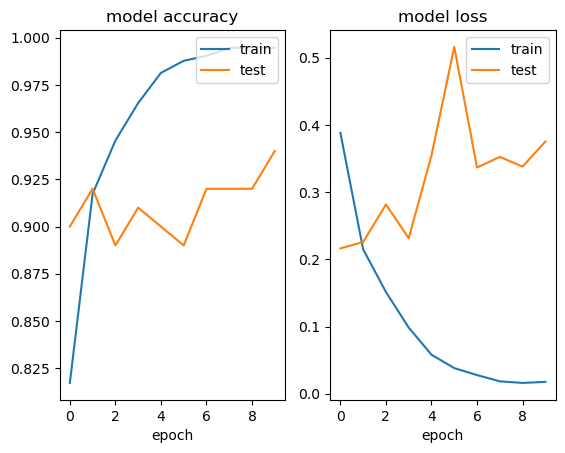

In [82]:
batch_size = 100
num_epochs = 8

X_valid, y_valid = X_train_pad[:batch_size], y_train[:batch_size]
X_train_rnn, y_train_rnn = X_train_pad[batch_size:], y_train[batch_size:]


transformer.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

history_transformer = transformer.fit(X_train_rnn, 
                    y_train_rnn, 
                    validation_data = (X_valid, y_valid), 
                    batch_size = batch_size // 3, 
                    epochs = num_epochs)

plotTraining(history_transformer)